<a href="https://colab.research.google.com/github/rsdpraveena/SCT_ML_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2:** Customer Segmentation Using K-Means Clustering

Import required libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Load the dataset

In [25]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Select features related to purchase behaviour

In [27]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

Standardize the data

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Method to find optimal number of clusters

In [29]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Plot elbow curve

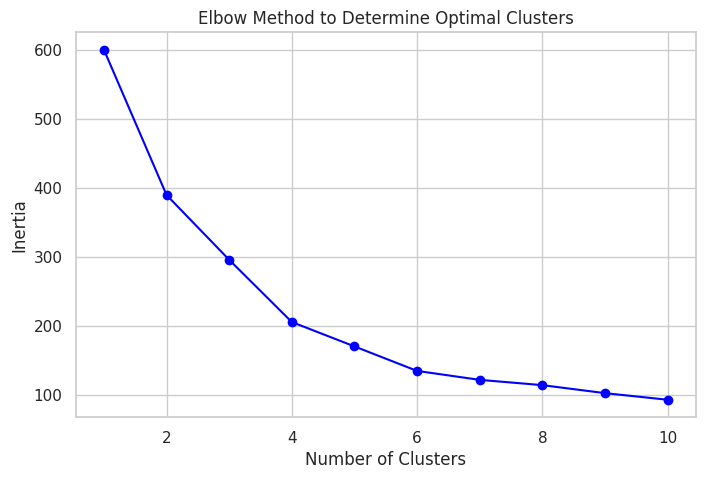

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.grid(True)
plt.show()


Apply KMeans clustering (using k = 5 as example)

In [31]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Convert centroids back to original scale for plotting

In [32]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

2D Scatter plot (Income vs Spending Score)

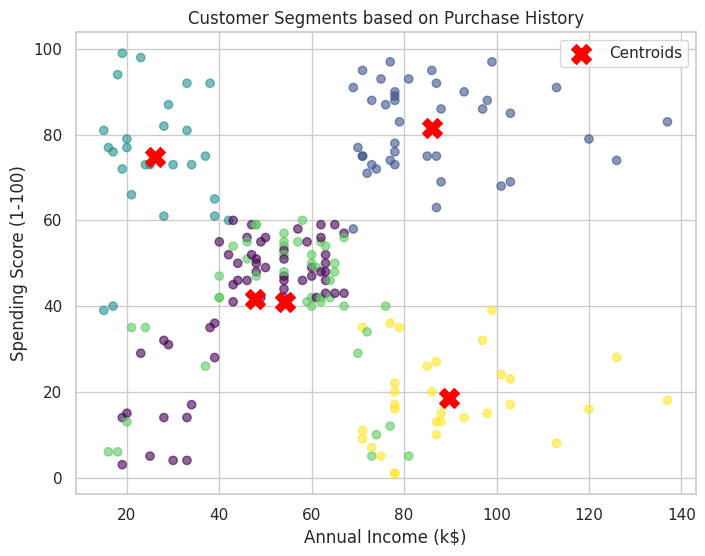

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Purchase History')
plt.legend()
plt.grid(True)
plt.show()

Evaluation of Clustering Performance

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")
db_score = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")

Silhouette Score: 0.408
Davies-Bouldin Index: 0.889
